In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
!ls

__notebook_source__.ipynb


In [3]:
df_train = pd.read_csv('../input/train.csv')
print (df_train.shape)
df_train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv('../input/test.csv')
print (df_test.shape)
df_test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = df_train.iloc[:,1:].values.astype('float32')
y_train = df_train.iloc[:,0].values.astype('int32')
X_test = df_test.iloc[:,:].values.astype('float32')

In [6]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)

(42000, 784)
(28000, 784)
(42000,)


In [7]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [8]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

## Feature Standardization


In [9]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
print (mean_px)
print (std_px)

33.408936
78.67759


In [10]:
def standardize(x):
    return (x-mean_px)/std_px

In [11]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
print (y_train.shape[1])

10


In [12]:
print (y_train.shape)

(42000, 10)


## Designing Neural Network Architecture


In [13]:
##Fix seed for producuing again
seed = 10
np.random.seed(seed)

### Linear Model

In [14]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [15]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [16]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

## Cross Validation

In [18]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
print 
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
batches_val = gen.flow(X_val, y_val, batch_size=64)

In [19]:
print (y_val.shape)

(4200, 10)


In [20]:
print (X.shape)
print (y.shape)

(42000, 28, 28, 1)
(42000, 10)


In [21]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, validation_data=batches_val, validation_steps=batches_val.n)

Epoch 1/3
37800/37800 [==============================] - 193s 5ms/step - loss: 0.5651 - acc: 0.9282 - val_loss: 0.9830 - val_acc: 0.9052
Epoch 2/3
37800/37800 [==============================] - 190s 5ms/step - loss: 0.5142 - acc: 0.9456 - val_loss: 1.1391 - val_acc: 0.9064
Epoch 3/3
37800/37800 [==============================] - 189s 5ms/step - loss: 0.4866 - acc: 0.9522 - val_loss: 1.1619 - val_acc: 0.9050


In [22]:
print (history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


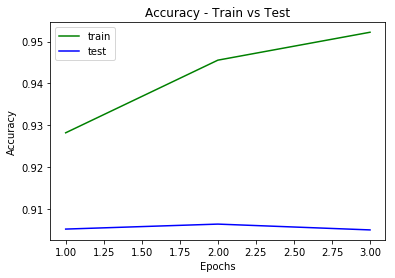

In [23]:
plt.plot(range(1,4),history.history['acc'],'g')
plt.plot(range(1,4),history.history['val_acc'],'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy - Train vs Test')
plt.legend(['train','test'])
plt.show()

In [24]:
def get_fc_model():
    model = Sequential()
    model.add(Lambda(standardize, input_shape=(28,28,1)))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.01), metrics=['accuracy'])
    return model

In [25]:
model_fc = get_fc_model()
history_fc = model_fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=batches_val, validation_steps=batches_val.n)

Epoch 1/1
37800/37800 [==============================] - 219s 6ms/step - loss: 0.2897 - acc: 0.9773 - val_loss: 0.4254 - val_acc: 0.9719


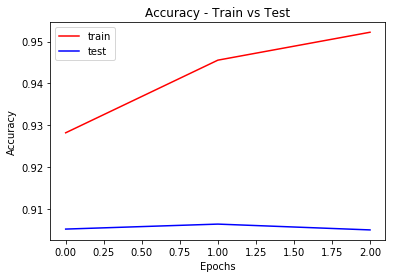

In [26]:
##Plot accuracy and loss curves
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy - Train vs Test')
plt.legend(['train','test'])
plt.show()

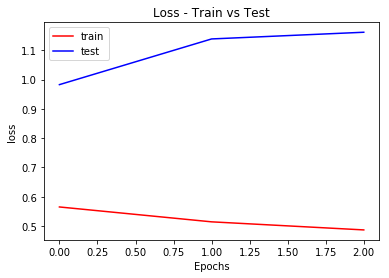

In [27]:
##Plot accuracy and loss curves
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss - Train vs Test')
plt.legend(['train','test'])
plt.show()

In [28]:
def cnn_model():
    model = Sequential()
    model.add(Lambda(standardize, input_shape=(28,28,1)))
    model.add(Convolution2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01), metrics=['accuracy'])
    return model

In [29]:
model_cnn = cnn_model()
history_cnn = model_cnn.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=batches_val, validation_steps=batches_val.n)

Epoch 1/1
37800/37800 [==============================] - 439s 12ms/step - loss: 0.7842 - acc: 0.9464 - val_loss: 1.7660 - val_acc: 0.8904


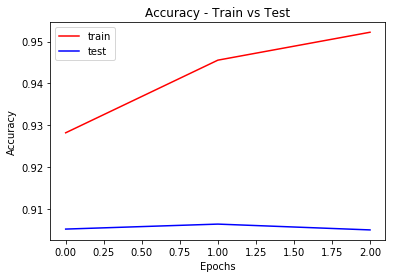

In [30]:
##Plot accuracy and loss curves
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy - Train vs Test')
plt.legend(['train','test'])
plt.show()

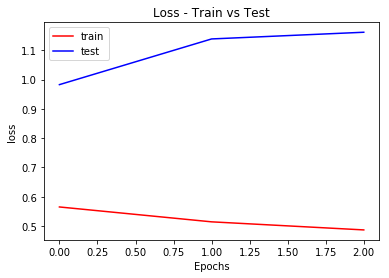

In [31]:
##Plot accuracy and loss curves
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss - Train vs Test')
plt.legend(['train','test'])
plt.show()

1. ## Data Agumentation

In [32]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [33]:
model_cnn.optimizer.lr=0.001
history=model_cnn.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 908s 24ms/step - loss: 3.9664 - acc: 0.7539 - val_loss: 4.3394 - val_acc: 0.7308


This is Giving better accuracy. Maybe due to generalisation

 ## Batch Normalisation with Data agumentation and deeper model

In [34]:
from keras.layers import BatchNormalization

In [35]:
def get_bn_model():
    model = Sequential()
    model.add(Lambda(standardize, input_shape=(28,28,1)))
    model.add(Convolution2D(32,(3,3),activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(BatchNormalization(axis=1))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01), metrics=['accuracy'])
    return model
    

In [36]:
model_bn = get_bn_model()
history_bn = model_bn.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 1229s 33ms/step - loss: 0.1136 - acc: 0.9783 - val_loss: 0.1127 - val_acc: 0.9749


#### Awesome accuracy....Lets train the whole data on the same model for final submissions

In [37]:
gen = image.ImageDataGenerator()
batches = gen.flow(X,y, batch_size=64)
history_final = model_bn.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1)

Epoch 1/1
42000/42000 [==============================] - 895s 21ms/step - loss: 0.1450 - acc: 0.9813


In [38]:
predictions = model_bn.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("result_rishav.csv", index=False, header=True)

In [39]:
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [40]:
print(os.listdir("."))

['__notebook_source__.ipynb', '.ipynb_checkpoints', 'result_rishav.csv']
